<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- 다양한 알고리즘으로 모델을 만들고 성능을 비교합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/admission_simple.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 데이터 살펴보기
data.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [4]:
# 기초통계정보 확인
data.describe()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.436000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.496384
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


In [28]:
# 상관관계 확인
data.corr()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
GRE,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.701671
TOEFL,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.680503
RANK,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.618367
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.606876
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.536527
GPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.752196
RESEARCH,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.503104
ADMIT,0.701671,0.680503,0.618367,0.606876,0.536527,0.752196,0.503104,1.000000


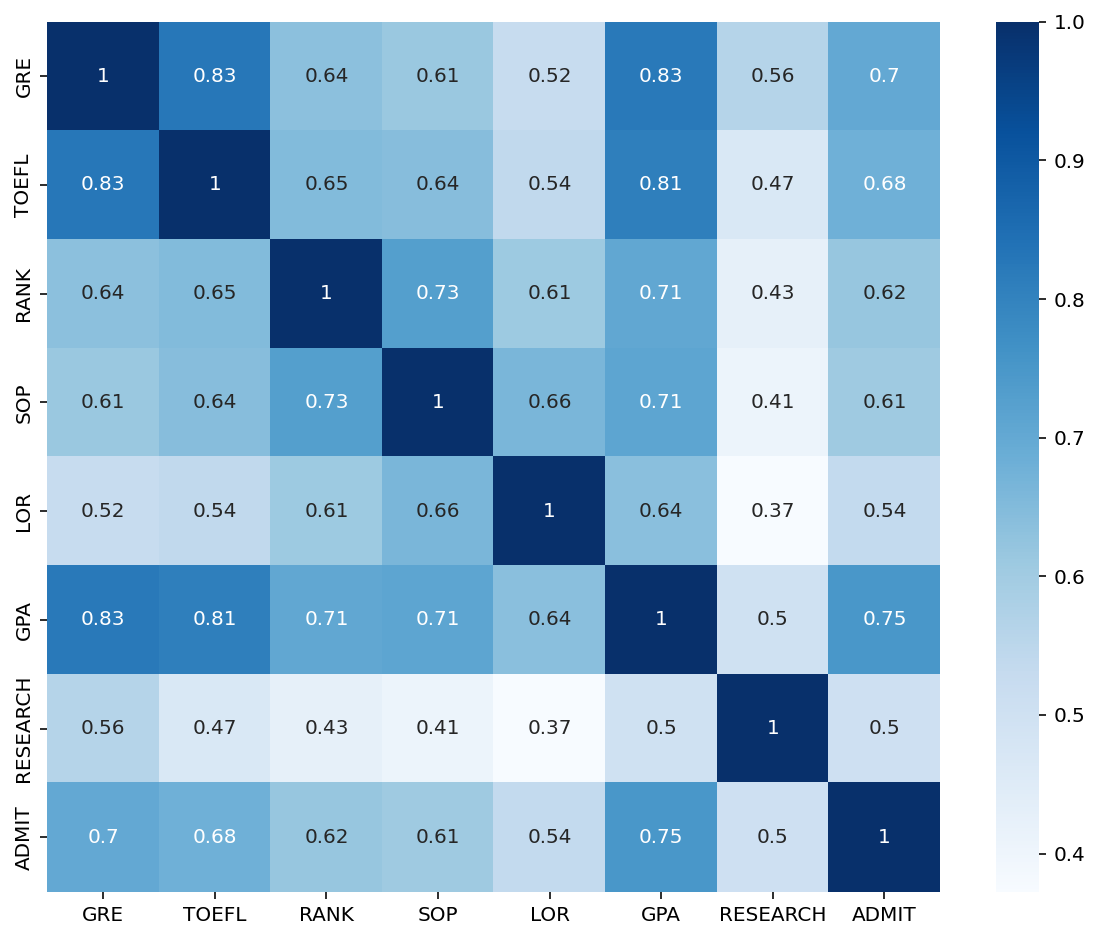

In [39]:
# 상관관계 시각화
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [5]:
# target 확인
target = 'ADMIT'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target] 

**2) 정규화**

In [6]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

**3) 학습용, 평가용 데이터 분리**

In [7]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 다양한 알고리즘으로 모델을 만들고 성능을 확입니다.
- 성능 평가는 confusion_matrix, classification_report를 사용합니다.

## 4.1.KNN

- KNN 알고리즘으로 모델링하고 성능을 확인합니다.

In [8]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [9]:
# 2단계: 선언하기
model = KNeighborsClassifier()

In [10]:
# 3단계: 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [11]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [12]:
# 5단계: 평가하기
result = {}
result['KNN'] = classification_report(y_test, y_pred)

## 4.2.Decision Tree

- Decision Tree 알고리즘으로 모델링하고 성능을 확인합니다.

In [13]:
# 1단계: 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [14]:
# 2단계: 선언하기
model = DecisionTreeClassifier(random_state=2022)

In [15]:
# 3단계: 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [16]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [17]:
# 5단계: 평가하기
result['Decision Tree'] = classification_report(y_test, y_pred)

## 4.3.Logistic Regression

- Logistic Regression 알고리즘으로 모델링하고 성능을 확인합니다.

In [18]:
# 1단계: 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [19]:
# 2단계: 선언하기
model = LogisticRegression(random_state=2022)

In [20]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LogisticRegression(random_state=2022)

In [21]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [22]:
# 5단계: 평가하기
result['Logistic Regression'] = classification_report(y_test, y_pred)

## 4.4.SVM

- SVM 알고리즘으로 모델링하고 성능을 확인합니다.

In [23]:
# 1단계: 불러오기
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [24]:
# 2단계: 선언하기
model = SVC(random_state=2022)

In [25]:
# 3단계: 학습하기
model.fit(x_train, y_train)

SVC(random_state=2022)

In [26]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [27]:
# 5단계: 평가하기
result['SVM'] = classification_report(y_test, y_pred)

## 4.5.Random Forest

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.

In [40]:
# 1단계: 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [41]:
# 2단계: 선언하기
model = RandomForestClassifier(random_state=2022)

In [42]:
# 3단계: 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(random_state=2022)

In [43]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [44]:
# 5단계: 평가하기
result['Random Forest'] = classification_report(y_test, y_pred)

## 4.6.XGBoost

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.

In [ ]:
# xgboost 설치
# pip install xgboost

In [45]:
# 1단계: 불러오기
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [53]:
# 2단계: 선언하기
model = XGBClassifier(eval_metric='logloss', random_state=2022)

In [54]:
# 3단계: 학습하기
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2022,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [56]:
# 5단계: 평가하기
result['XGBoost'] = classification_report(y_test, y_pred)

# 5.결과 확인

In [57]:
# 평가 결과 확인
for m_name, m_score in result.items() :
    print('='*56)
    print(m_name)
    print('-'*56)
    print(m_score)

KNN
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.90      0.91        83
           1       0.88      0.90      0.89        67

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150

Decision Tree
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        83
           1       0.81      0.81      0.81        67

    accuracy                           0.83       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.83      0.83      0.83       150

Logistic Regression
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        83
           1       0.90     